# Capstone Project 2: Airbnb listings Bangkok Analysis

## introduction and case:


-You and your friend are planning to buy a property in Bangkok to be invested in Airbnb Business.

-So you want to know which property to buy (In which neighbourhod and what room type to buy and rented later)

-We will have 2 framework to solve this problem

-first is by lookback the past perfomance of each property in the last 12 month using reivews_ltm

-second is to use availability_365 column

## Part A: Data Cleaning

In [14]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("Airbnb Listings Bangkok.csv", index_col=0)

In [15]:
dataset.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaN,NaN,3,365,0


### A1: Remove unnecessary columns

In [17]:
#Latitute and Longitude dont have any meaningful information for our current analysis
#Because the neighbourhood column is enough
#Like if we use longitude and longitude into our analysis it will be making it unnecessary complex.
#Because why do we need to analyze each lotitute and longitude pair if it points out/determine the property to the same neighbourhood ?
#So we will remove the Latitute and Longitude column
dataset.drop(columns=['latitude','longitude'], inplace = True)

KeyError: "['latitude', 'longitude'] not found in axis"

In [18]:
#calculated_host_listings_count also not needed
#because even though it is true people will most likely book a place from a person with many property rented
#If a person has many properties, reviews and the rooms being rented. It will increase the credibility of that person thus increasing the chance of people to rent his/her other property.
#But in our case we only buy 1 property, so this column is unnecessary
dataset.drop(columns=['calculated_host_listings_count'], inplace = True)

In [19]:
#We do not need id, host_name, host_id to generate the insight we want from this data
#So we can just remove it
#It is true that id is needed to search the listing room fast, but actually in this context pandas. It is faster to search from the index rather than the id
#If we search from the ID it will iterate all the rows until it gets the matching id
#If we search from index it will o(n) because the index work as the index like the key in the dictionary
dataset.drop(columns=['id','host_id','host_name'], inplace = True)

In [20]:
dataset.head()

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Ratchathewi,Entire home/apt,1905,3,65,2020-01-06,0.50,353,0
1,"Easy going landlord,easy place",Bang Na,Private room,1316,1,0,NaN,NaN,358,0
2,modern-style apartment in Bangkok,Bang Kapi,Private room,800,60,0,NaN,NaN,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,Private room,1286,7,2,2022-04-01,0.03,323,1
4,Suite Room 3 at MetroPoint,Bang Kapi,Private room,1905,1,0,NaN,NaN,365,0


### A2: Do the data type checking for each columns


In [23]:
#First we must check each columns data type
pd.options.display.float_format = '{:.2f}'.format
dataset.dtypes

,0
name,object
neighbourhood,object
room_type,object
price,int64
minimum_nights,int64
number_of_reviews,int64
last_review,datetime64[ns]
reviews_per_month,float64
availability_365,int64
number_of_reviews_ltm,int64


In [22]:
#We can see that the last_review is object, it should be datetime
#So we change it to the datatime
dataset['last_review'] = pd.to_datetime(dataset['last_review'])

### A3: Remove unnecessery rows


In [10]:
dataset.describe()

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,10064,10064.00,15854.00,15854.00
mean,3217.70,15.29,16.65,2021-08-30 08:37:49.316375296,0.81,244.38,3.48
min,0.00,1.00,0.00,2012-12-15 00:00:00,0.01,0.00,0.00
25%,900.00,1.00,0.00,2020-02-20 00:00:00,0.12,138.00,0.00
50%,1429.00,1.00,2.00,2022-10-24 00:00:00,0.43,309.00,0.00
75%,2429.00,7.00,13.00,2022-12-08 00:00:00,1.06,360.00,3.00
max,1100000.00,1125.00,1224.00,2022-12-28 00:00:00,19.13,365.00,325.00
std,24972.12,50.82,40.61,NaN,1.09,125.84,8.92


In [24]:
#Remove unactive listing
#Unactive listing means is the apartment with the latest review is quite old like from 2020 and the availability_365 is 0
#Availability_365 means the number of days the property is available to rent
#If availability is 0, it is more likely that the property is not rented or blocked by the owner
#It is even more convincing if the last review was from years ago
#So it is better to remove listing that is not available and the last review was quite old
dataset = dataset[~((dataset['last_review'] < '2020-01-01') & (dataset['availability_365'] == 0))]

In [25]:
dataset
#Removing the old listing is enough for now
#We dont want to remove too many rows because many rows dont have anomaly data in it
#The NAN in the last review means it has poor perfomance / poor occupancy rate

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Ratchathewi,Entire home/apt,1905,3,65,2020-01-06,0.50,353,0
1,"Easy going landlord,easy place",Bang Na,Private room,1316,1,0,NaT,NaN,358,0
2,modern-style apartment in Bangkok,Bang Kapi,Private room,800,60,0,NaT,NaN,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,Private room,1286,7,2,2022-04-01,0.03,323,1
4,Suite Room 3 at MetroPoint,Bang Kapi,Private room,1905,1,0,NaT,NaN,365,0
...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Pra Wet,Private room,2298,28,0,NaT,NaN,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Ratchathewi,Private room,1429,1,0,NaT,NaN,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Ratchathewi,Private room,1214,1,0,NaT,NaN,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Ratchathewi,Private room,1214,1,0,NaT,NaN,365,0


## Part B: Data Analysis

In [26]:
dataset

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Ratchathewi,Entire home/apt,1905,3,65,2020-01-06,0.50,353,0
1,"Easy going landlord,easy place",Bang Na,Private room,1316,1,0,NaT,NaN,358,0
2,modern-style apartment in Bangkok,Bang Kapi,Private room,800,60,0,NaT,NaN,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,Private room,1286,7,2,2022-04-01,0.03,323,1
4,Suite Room 3 at MetroPoint,Bang Kapi,Private room,1905,1,0,NaT,NaN,365,0
...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Pra Wet,Private room,2298,28,0,NaT,NaN,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Ratchathewi,Private room,1429,1,0,NaT,NaN,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Ratchathewi,Private room,1214,1,0,NaT,NaN,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Ratchathewi,Private room,1214,1,0,NaT,NaN,365,0


In [ ]:
#Because we want to buy a property to being rented again
#We can look at 2 ways
#First method is to look backwards, we look at the data of how property, which neighbourhood, which room type perfom the best in the past
#Second method is we look at the availability365 column as it represent the perfomance of the property, neighbourhoud, roomtype in the present/future
#avaialibity365 can tell us which property or neighbourhood or roomtype is on demand
#but still availibity365 could also give us missintepretation, we could saw that the metrics are good but it is because the owner blocked listing

### First Method: We look backwards

We use number_of_reviews_ltm

In [27]:
#number_of_reviews_ltm might be better to use than number_of_reviews
#because last year perfomance could predict next year perfomance better
#than using all the data from years ago
stats2 = dataset.groupby('neighbourhood')['number_of_reviews_ltm'].agg(['count','min','median','max','mean','sum'])
print(stats2.sort_values(by='count', ascending=False).head(10))

#Insight:
#-Vadhana and Khlong Toei are still in the top number_of_reviews_ltm sum

               count  min  median  max  mean    sum
neighbourhood                                      
Vadhana         2130    0    1.00   55  4.56   9709
Khlong Toei     2081    0    2.00  118  6.54  13601
Huai Khwang     1101    0    0.00  138  2.32   2557
Ratchathewi     1098    0    0.00  325  4.06   4455
Bang Rak         817    0    0.00  101  4.19   3420
Sathon           806    0    1.00   48  4.01   3232
Phra Nakhon      599    0    0.00   57  3.00   1799
Phra Khanong     554    0    0.00  246  2.29   1271
Chatu Chak       544    0    0.00   62  2.17   1180
Bang Na          455    0    0.00   31  2.13    970


In [28]:
sum_per_count2 = stats2['sum']/stats2['count']
stats2['sum_per_count'] = sum_per_count2

print(stats2.sort_values(by='sum_per_count', ascending=False).head(10))

#Insight:
#We can see that Khlong Toei sum_per_count are only 6.54
#Meaning it has many listing yet not all occupied
#I can see that Pom Prap Sattru Phai and Lat Krabang are better because they have low listing count but high sum_per_count compared to other
#So our candidate are:
#   -Khlong Toei (many listing but not very occupied, high competition)
#   -Pom Prap Sattru Phai
#   -Phaya Thai
#   -Lat Krabang
#   -Vadhana (many listing but not very occupied, high competition)

                      count  min  median  max  mean    sum  sum_per_count
neighbourhood                                                            
Khlong Toei            2081    0    2.00  118  6.54  13601           6.54
Pom Prap Sattru Phai    121    0    0.00   73  6.03    730           6.03
Phaya Thai              415    0    0.00  141  4.96   2059           4.96
Lat Krabang             149    0    0.00  147  4.83    720           4.83
Vadhana                2130    0    1.00   55  4.56   9709           4.56
Bang Rak                817    0    0.00  101  4.19   3420           4.19
Ratchathewi            1098    0    0.00  325  4.06   4455           4.06
Sathon                  806    0    1.00   48  4.01   3232           4.01
Din Daeng               441    0    0.00  277  3.98   1756           3.98
Parthum Wan             450    0    1.00   59  3.71   1670           3.71


In [29]:
candidate = dataset[dataset['neighbourhood'].isin(['Pom Prap Sattru Phai', 'Phaya Thai', 'Sathon', 'Bang Rak', 'Khlong San', 'Khlong Toei', 'Lat Krabang', 'Vadhana'])]
candidate

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
9,Standard Room Decor do Hostel,Khlong San,Private room,700,2,4,2019-12-27,0.03,87,0
10,Sathorn Terrace Apartment(61),Bang Rak,Private room,1150,2,27,2019-01-03,0.19,320,0
11,2BR apt in a cozy neighborhood,Phaya Thai,Entire home/apt,1893,15,129,2022-09-30,1.17,356,1
12,Comfy bedroom near River pier & BTS Taksin.,Sathon,Hotel room,1862,2,208,2019-12-02,1.44,361,0
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Khlong Toei,Entire home/apt,1400,30,0,NaT,NaN,365,0
...,...,...,...,...,...,...,...,...,...,...
15830,Cozy place in Ari residence area,Phaya Thai,Private room,720,1,0,NaT,NaN,363,0
15831,Family Room for 4 People,Vadhana,Private room,2237,1,0,NaT,NaN,360,0
15833,iSanook Suite 34 sqm 8,Bang Rak,Private room,1900,30,0,NaT,NaN,363,0
15834,SuperHost Studio Sukhumvit BTS Nana 5min 200M ...,Khlong Toei,Entire home/apt,2271,1,0,NaT,NaN,344,0


Now we have the candidate, we want to check the room type perfomance of each neighbourhood candidate

In [30]:
neighbourhood_roomtype = candidate.groupby(['neighbourhood', 'room_type'])['number_of_reviews_ltm'].agg(['count', 'min','median', 'max', 'mean','sum'])
neighbourhood_roomtype['sum_per_count'] = neighbourhood_roomtype['sum'] / neighbourhood_roomtype['count']
neighbourhood_roomtype

count  min  median  max  mean    sum  \
neighbourhood        room_type                                               
Bang Rak             Entire home/apt    344    0    2.50   90  7.56   2602   
                     Hotel room          66    0    0.00   46  1.92    127   
                     Private room       373    0    0.00  101  1.82    679   
                     Shared room         34    0    0.00    3  0.35     12   
Khlong San           Entire home/apt    182    0    0.00   43  3.02    549   
                     Hotel room          26    0    0.00    5  0.65     17   
                     Private room       133    0    0.00   29  0.92    123   
                     Shared room         11    0    0.00    0  0.00      0   
Khlong Toei          Entire home/apt   1514    0    3.00  118  8.20  12422   
                     Hotel room          66    0    1.00   22  2.88    190   
                     Private room       488    0    0.00   39  2.02    986   
                     Shared room         13    0    0.00    1  0.23      3   
Lat Krabang          Entire home/apt     39    0    0.00   60  4.05    158   
                     Hotel room          14    0    2.50  147 18.93    265   
                     Private room        80    0    0.00  146  3.70    296   
                     Shared room         16    0    0.00    1  0.06      1   
Phaya Thai           Entire home/apt    197    0    1.00  141  9.28   1829   
                     Hotel room          26    0    0.00    6  0.62     16   
                     Private room       173    0    0.00   30  1.19    206   
                     Shared room         19    0    0.00    7  0.42      8   
Pom Prap Sattru Phai Entire home/apt     49    0    1.00   48  7.94    389   
                     Hotel room          10    0    0.00    2  0.20      2   
                     Private room        57    0    0.00   73  5.95    339   
                     Shared room          5    0    0.00    0  0.00      0   
Sathon               Entire home/apt    555    0    2.00   48  5.16   2863   
                     Hotel room          15    0    0.00    9  0.67     10   
                     Private room       219    0    0.00   42  1.59    349   
                     Shared room         17    0    0.00    8  0.59     10   
Vadhana              Entire home/apt   1442    0    2.00   55  6.03   8692   
                     Hotel room         101    0    0.00   33  1.43    144   
                     Private room       534    0    0.00   44  1.56    831   
                     Shared room         53    0    0.00   11  0.79     42   

                                      sum_per_count  
neighbourhood        room_type                       
Bang Rak             Entire home/apt           7.56  
                     Hotel room                1.92  
                     Private room              1.82  
                     Shared room               0.35  
Khlong San           Entire home/apt           3.02  
                     Hotel room                0.65  
                     Private room              0.92  
                     Shared room               0.00  
Khlong Toei          Entire home/apt           8.20  
                     Hotel room                2.88  
                     Private room              2.02  
                     Shared room               0.23  
Lat Krabang          Entire home/apt           4.05  
                     Hotel room               18.93  
                     Private room              3.70  
                     Shared room               0.06  
Phaya Thai           Entire home/apt           9.28  
                     Hotel room                0.62  
                     Private room              1.19  
                     Shared room               0.42  
Pom Prap Sattru Phai Entire home/apt           7.94  
                     Hotel room                0.20  
                     Private room              5.95  
                     Shared room   

In [ ]:
neighbourhood_roomtype.sort_values(by='sum_per_count', ascending=False).head(10)
#Insight:
#  -From here we can tell that Khlong Toei and Vedhana with Entire home/apr are the most listed and demanded
#  -But the sum_per_count metrics show that Lat krabang with hotel room type are the best in the metric
#  -But the Lat Krabang count are very low, meaning not enough data. The data could be happened by accident
#  -So it is better to exclude Lat Krabang & Hotel room

,,count,min,median,max,mean,sum,sum_per_count
neighbourhood,room_type,,,,,,,
Lat Krabang,Hotel room,14,0,2.50,147,18.93,265,18.93
Phaya Thai,Entire home/apt,197,0,1.00,141,9.28,1829,9.28
Khlong Toei,Entire home/apt,1514,0,3.00,118,8.20,12422,8.20
Pom Prap Sattru Phai,Entire home/apt,49,0,1.00,48,7.94,389,7.94
Bang Rak,Entire home/apt,344,0,2.50,90,7.56,2602,7.56
Vadhana,Entire home/apt,1442,0,2.00,55,6.03,8692,6.03
Pom Prap Sattru Phai,Private room,57,0,0.00,73,5.95,339,5.95
Sathon,Entire home/apt,555,0,2.00,48,5.16,2863,5.16
Lat Krabang,Entire home/apt,39,0,0.00,60,4.05,158,4.05


In [ ]:
#so the result from first backward analysis are:
# 1. Entire home/apt in Phaya Thai (Competition is not that big, good occupancy rate, good demand)
# 2. Entire home/apt in Khlong Toei (Competition is very high, good occupancy rate, very high demand)
# 3. Entire home/apt in Pom Prap Sattru Phai (Competition is low, good occupancy rate according to the data, less demand)
# 4. Entire home/apt in Bang Rak (Competition is medium, good occupancy rate, high demand)
# 5. Entire home/apt in Vadhana (Competition is very high, good occupancy rate, very high demand)

#If we want less competition, we could choose option 1,3,4
#If we want to buy property in the crowded high demand area, there will be high competition but if we are confident we can choose option 1,2,5

### Second Method: Using availability_365 to look its current perfomance/future

In [31]:
#We do the data cleaning again
#Now this time we will be removing property listed with availability_365 == 0-30
#It is very unlikely that the property has fully rented for the whole next year or 90% of the available year
dataset = dataset[~(dataset['availability_365'].isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]))]
dataset

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Ratchathewi,Entire home/apt,1905,3,65,2020-01-06,0.50,353,0
1,"Easy going landlord,easy place",Bang Na,Private room,1316,1,0,NaT,NaN,358,0
2,modern-style apartment in Bangkok,Bang Kapi,Private room,800,60,0,NaT,NaN,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,Private room,1286,7,2,2022-04-01,0.03,323,1
4,Suite Room 3 at MetroPoint,Bang Kapi,Private room,1905,1,0,NaT,NaN,365,0
...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Pra Wet,Private room,2298,28,0,NaT,NaN,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Ratchathewi,Private room,1429,1,0,NaT,NaN,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Ratchathewi,Private room,1214,1,0,NaT,NaN,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Ratchathewi,Private room,1214,1,0,NaT,NaN,365,0


In [32]:
#Now we want to see which neighbourhood has the best availability_365 value
#Too low can mean it is unavaialble the next whole year
#Not Because it has been fully rented for the whole years, 365 days. very unlikely
#Too high means no one occupied it, not very popular
#I think the sweet spot is around 335-275 (The apartment has been booked for 30 days-90 days from the total available of 365 days)

dataset_availability_grouped = dataset.groupby('neighbourhood')['availability_365'].agg(['count','min','median','max'])
dataset_availability_grouped.sort_values(['median','count'], ascending=True).head(10)

#From here we can see that the top 10 neighbourhood has the property booked by at least 1 month
#Top neighbourhood has very low count, means it can a fluke or lucky, not enough data so we will exclude it
#We can tell that these 10 neighbourhood is in the rise

,count,min,median,max
neighbourhood,,,,
Thawi Watthana,11,89,256.00,365
Bang Sue,242,35,268.50,365
Nong Chok,14,83,271.50,365
Huai Khwang,943,31,272.00,365
Vadhana,1996,32,294.00,365
Wang Thong Lang,90,60,296.00,365
Bang Phlat,199,38,297.00,365
Phra Khanong,529,31,302.00,365
Thon buri,167,32,303.00,365


In [33]:
#After this we want to see which room type pair with the neighbourhood that result in very high demand / low availability_365 number
filtered_top_10_by_availability = dataset[dataset['neighbourhood'].isin(['Thawi Watthana', 'Bang Sue', 'Nong Chok', 'Huai Khwang', 'Vadhana',
       'Wang Thong Lang', 'Bang Phlat', 'Phra Khanong', 'Thon buri',
       'Khlong Toei'])]

filtered_top_10_by_availability

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Khlong Toei,Entire home/apt,1400,30,0,NaT,NaN,365,0
16,Nice and Quiet condo near BTS Onnut,Khlong Toei,Entire home/apt,1577,30,78,2019-05-31,0.78,330,0
18,Central Bangkok 3 Bedroom Apartment,Khlong Toei,Entire home/apt,5680,28,148,2020-01-07,1.08,334,0
19,The Duplex - Asoke- Luxury 92sqm,Vadhana,Entire home/apt,5034,21,287,2022-11-22,2.59,349,3
22,Siamese Gioia on Sukhumvit 31,Vadhana,Private room,3775,30,3,2018-12-24,0.05,364,0
...,...,...,...,...,...,...,...,...,...,...
15831,Family Room for 4 People,Vadhana,Private room,2237,1,0,NaT,NaN,360,0
15834,SuperHost Studio Sukhumvit BTS Nana 5min 200M ...,Khlong Toei,Entire home/apt,2271,1,0,NaT,NaN,344,0
15835,*Best Pool View*5 Min​ Walk to MRT*Wifi*Washma...,Huai Khwang,Entire home/apt,1442,2,0,NaT,NaN,90,0
15839,Ratchada Condo next To MRT,Huai Khwang,Entire home/apt,2100,28,0,NaT,NaN,332,0


In [36]:
grouped = filtered_top_10_by_availability.groupby(['neighbourhood','room_type'])['availability_365'].agg(['count','median','mean']).sort_values(by='median')
grouped[grouped['count']>100] #We remove the aggregation with very low count, because not enough data
#Insight:
#From here we can see that crowded high demand area like Vadhana and Khlong Toei
#Are advancely booked
#But we must see that those 2 total count are very high
#Meaning competitions are also very high

,,count,median,mean
neighbourhood,room_type,,,
Vadhana,Entire home/apt,1353,180.00,219.55
Khlong Toei,Entire home/apt,1445,241.00,228.57
Huai Khwang,Private room,285,269.00,241.33
Bang Sue,Entire home/apt,164,270.50,241.52
Huai Khwang,Entire home/apt,619,272.00,234.68
Phra Khanong,Entire home/apt,322,279.50,244.00
Bang Phlat,Entire home/apt,115,291.00,246.45
Phra Khanong,Private room,186,325.50,253.74
Khlong Toei,Private room,464,353.00,297.24


In [ ]:
#so the result from using availability_365 is
# 1. Entire home/apt in Vadhana (Competition is very high, good occupancy rate, very high demand)
# 2. Entire home/apt in Khlong Toei (Competition is very high, good occupancy rate, very high demand)
# 3. Entire home/apt in Bang Sue (Competition is low, good occupancy rate, very high demand)
# 4. Entire home/apt in Huai Khwang (Competition is high, good occupancy rate, very high demand)
# 5. Entire home/apt in Phra Khanong (Competition is low, good occupancy rate, very high demand)


#If we want less competition, we could choose option 3,4,5
#If we want to buy property in the crowded high demand area with occopancy rate very high we can choose option 1,2 but it will be a competition

## Part C: Data Visualization & Summary

### Simple Visualization

In [37]:
dataset.head(5)

,name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Ratchathewi,Entire home/apt,1905,3,65,2020-01-06,0.50,353,0
1,"Easy going landlord,easy place",Bang Na,Private room,1316,1,0,NaT,NaN,358,0
2,modern-style apartment in Bangkok,Bang Kapi,Private room,800,60,0,NaT,NaN,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Din Daeng,Private room,1286,7,2,2022-04-01,0.03,323,1
4,Suite Room 3 at MetroPoint,Bang Kapi,Private room,1905,1,0,NaT,NaN,365,0


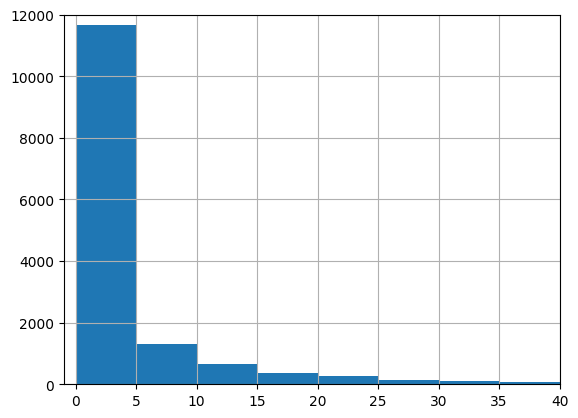

In [38]:
import matplotlib.pyplot as plt
dataset['number_of_reviews_ltm'].hist(bins=65)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.ylim(0, 12000)
plt.xlim(-1, 40)
plt.show()

#Here we can see number_of_reviews_ltm
#most property only has 0-5 reviews last year

<Axes: >

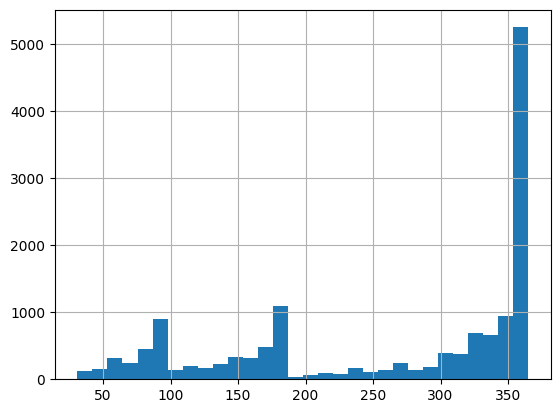

In [39]:
dataset['availability_365'].hist(bins=30)
#Here we can see the availability distribution
#Many properties have 365 availability meaning not yet booked, it can means bad perfomance
#some of the properties alredy have booked 6 months ahead

#330, 300, 180, 90 days are high compared to other because it is also equal to monthly

### Summary:




**Result from method 1**

1. Entire home/apt in Phaya Thai (Competition is not that big, good occupancy rate, good demand)

**2. Entire home/apt in Khlong Toei (Competition is very high, good occupancy rate, very high demand)**

3. Entire home/apt in Pom Prap Sattru Phai (Competition is low, good occupancy rate according to the data, less demand)

4. Entire home/apt in Bang Rak (Competition is medium, good occupancy rate, high demand)

**5. Entire home/apt in Vadhana (Competition is very high, good occupancy rate, very high demand)**




**Result from method 2**

**1. Entire home/apt in Vadhana (Competition is very high, good occupancy rate, very high demand)**

**2. Entire home/apt in Khlong Toei (Competition is very high, good occupancy rate, very high demand)**

3. Entire home/apt in Bang Sue (Competition is low, good occupancy rate, very high demand)

4. Entire home/apt in Huai Khwang (Competition is high, good occupancy rate, very high demand)

5. Entire home/apt in Phra Khanong (Competition is low, good occupancy rate, very high demand)

**We can choose the Entire home/apt in Vandhana or Khlong Toei as their result comes in the top 5 in both method, meaning those 2 have good metrics and score in each method.**

Once again it depands on the users, they can choose other than the recommended one. But the recommended one from result method 1 and 2 have basic statistics and analysis on it.

**Final answer is I recommended Entire home/apt in Vadhana or Entire home/apt in Khlong Toei**

Reasons are:

-Good occupancy rate/high in demand

-People booked the property of this area in advance (lower avaialability_365 score)

-It shows good past perfomance, many properties of this area have many number_of_reviews_ltm in the last 12 month


Cons:

-Because area is high in depand many people rented their properties here. (high competition)

